# Google Colab: Сравнение библиотек визуализации

## Импорт библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Настройка параметров фигуры

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)  # Устанавливаем размер фигуры в дюймах
plt.rcParams['font.size'] = 10  # Уменьшаем размер шрифта для графиков Matplotlib
sns.set(style="whitegrid")  # Настройка стиля для seaborn (сетка на белом фоне)

# Задаем случайное число для генерации данных

In [ ]:
RANDOM_SEED = 12
time = np.arange(5 * 365 + 1)  # Создаем массив времени с шагом в один день за 5 лет


def plot_series(time, series, format="-", start=0, end=None, label=None, color=None):
    """
    Функция для отображения серии данных через Matplotlib
    """
    plt.plot(time[start:end], series[start:end], format, label=label, color=color)
    plt.xlabel("Время")  # Устанавливаем метку оси X
    plt.ylabel("Значение")  # Устанавливаем метку оси Y
    if label:
        plt.legend(fontsize=8)  # Добавляем легенду с уменьшенным размером шрифта
    plt.grid(True, linestyle='--', alpha=0.7)  # Настраиваем сетку
    plt.tight_layout()  # Автоматически настраивает макет


def plot_seaborn_series(time, series, start=0, end=None, color="blue"):
    """
    Функция для отображения серии данных через seaborn
    """
    sns.lineplot(x=time[start:end], y=series[start:end], color=color)
    plt.xlabel("Время")
    plt.ylabel("Значение")
    plt.tight_layout()


def plot_plotly_series(time, series, start=0, end=None, title="Plot", color="blue"):
    """
    Функция для отображения серии данных через Plotly
    """
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=time[start:end], y=series[start:end], mode='lines', line=dict(color=color)))
    fig.update_layout(title=title, xaxis_title="Время", yaxis_title="Значение")
    fig.show()


def trend(time, slope=0):
    """
    Функция для создания линейного тренда.
    slope — наклон тренда (положительный или отрицательный)
    """
    return slope * time

# Функции для создания сезонности
def seasonal_pattern(season_time):
    """
    Функция для создания сезонного паттерна на основе времени.
    Используется косинус для первых 45% времени и экспоненциальная функция для оставшейся части.
    """
    return np.where(season_time < 0.45,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))


def seasonality(time, period, amplitude=1, phase=0):
    """
    Функция для создания сезонных колебаний с заданными параметрами.
    period — период сезонности, amplitude — амплитуда, phase — фаза смещения.
    """
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

# Функции для создания сезонности
def seasonal_pattern(season_time):
    """
    Функция для создания сезонного паттерна на основе времени.
    Используется косинус для первых 45% времени и экспоненциальная функция для оставшейся части.
    """
    return np.where(season_time < 0.45,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))


def seasonality(time, period, amplitude=1, phase=0):
    """
    Функция для создания сезонных колебаний с заданными параметрами.
    period — период сезонности, amplitude — амплитуда, phase — фаза смещения.
    """
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

# Функция для генерации белого шума
def white_noise(time, noise_level=1, seed=None):
    """
    Функция для создания белого шума с заданным уровнем шума.
    """
    random = np.random.RandomState(seed)
    return random.random(len(time)) * noise_level

# Создаем линейный тренд с положительной склонностью

## Визуализация с помощью Matplotlib

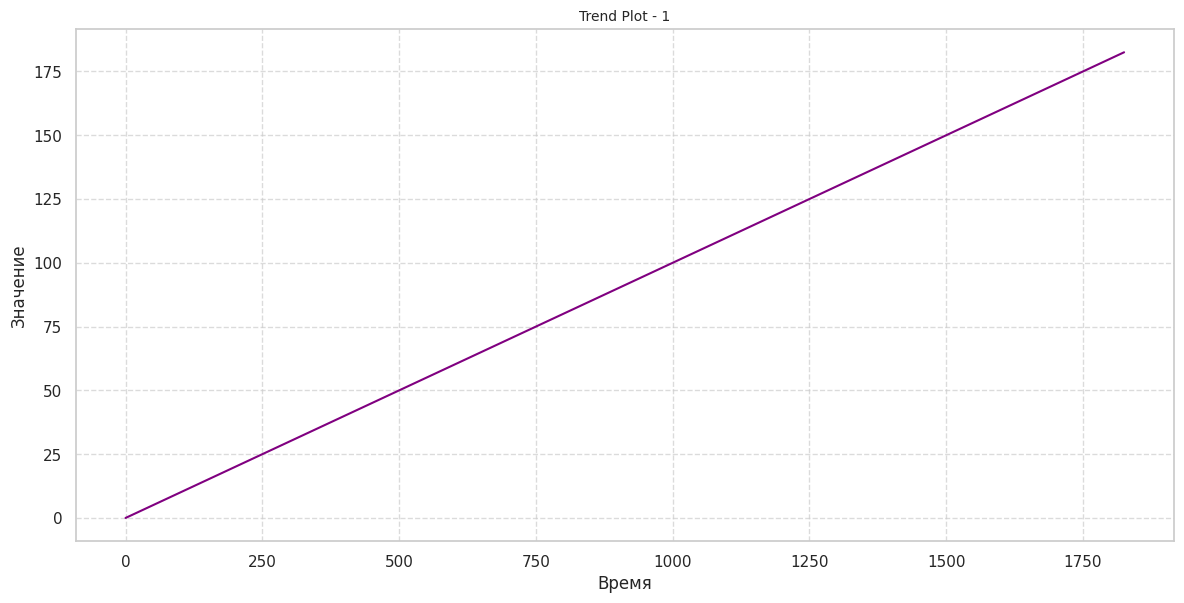

In [ ]:
slope = 0.1
series = trend(time, slope)
plt.figure(figsize=(12, 6))  # Устанавливаем размер фигуры
plot_series(time, series, color="purple")  # Отображаем серию данных в фиолетовом цвете
plt.title("Trend Plot - 1", fontdict={'fontsize': 10})  # Устанавливаем заголовок графика
plt.show()

## Визуализация с помощью Seaborn

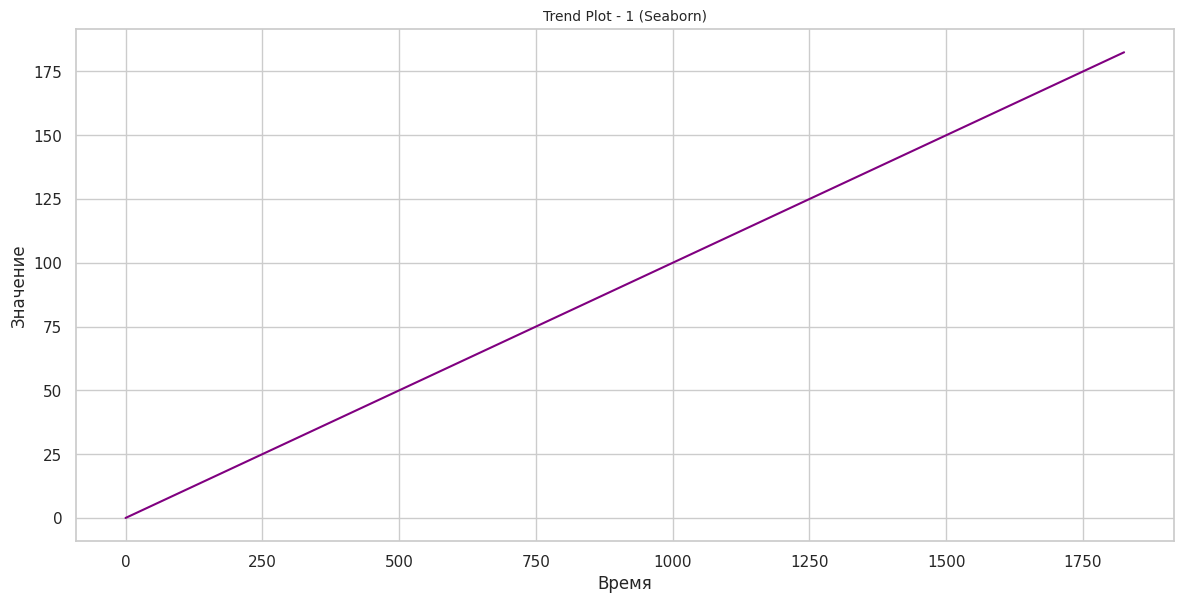

In [ ]:
plt.figure(figsize=(12, 6))
plot_seaborn_series(time, series, color="purple")
plt.title("Trend Plot - 1 (Seaborn)", fontdict={'fontsize': 10})
plt.show()

## Визуализация с помощью Plotly

In [ ]:
plot_plotly_series(time, series, title="Trend Plot - 1 (Plotly)", color="purple")

# Создаем тренд с отрицательным наклоном

## Визуализация с помощью Matplotlib

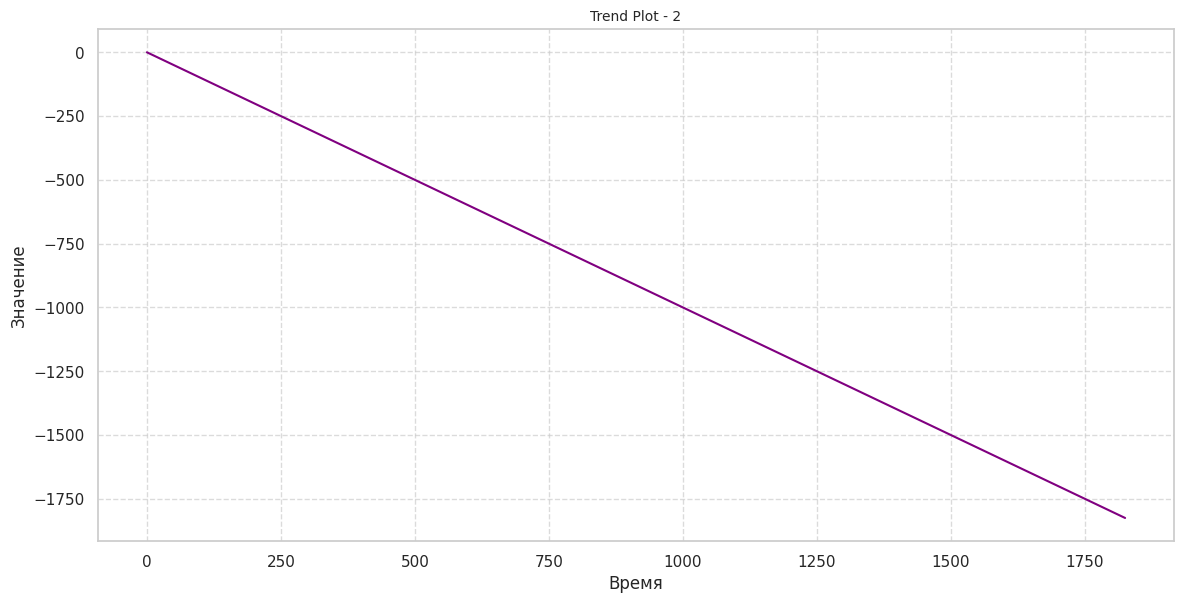

In [ ]:
slope = -1
series = trend(time, slope)
plt.figure(figsize=(12, 6))
plot_series(time, series, color="purple")
plt.title("Trend Plot - 2", fontdict={'fontsize': 10})
plt.show()

## Визуализация с помощью Seaborn

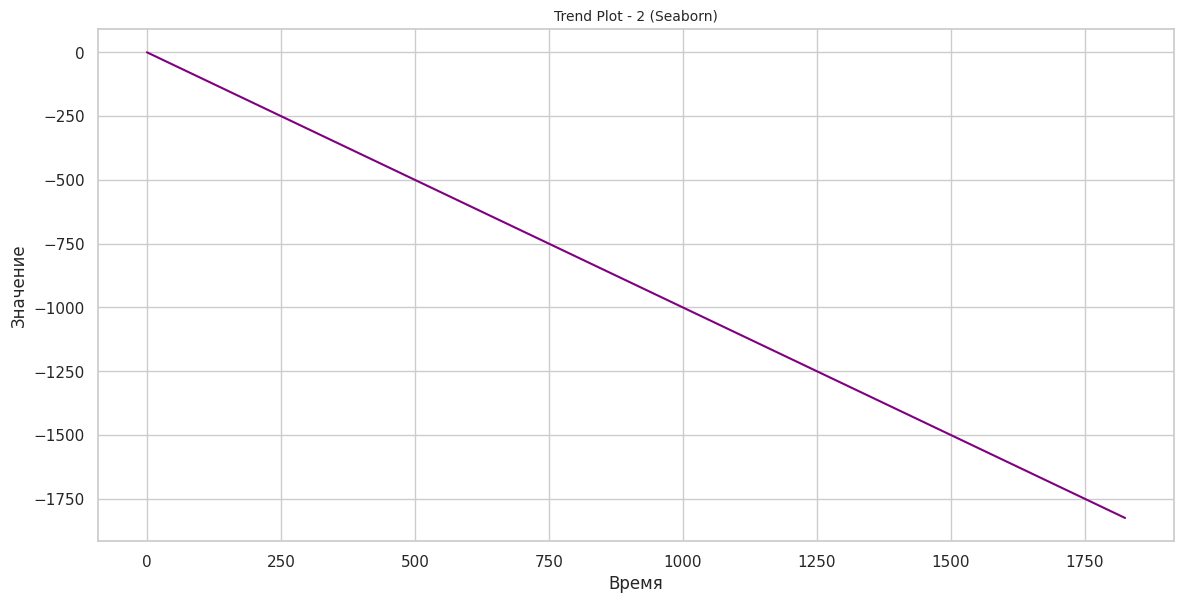

In [ ]:
plt.figure(figsize=(12, 6))
plot_seaborn_series(time, series, color="purple")
plt.title("Trend Plot - 2 (Seaborn)", fontdict={'fontsize': 10})
plt.show()

## Визуализация с помощью Plotly

In [ ]:
plot_plotly_series(time, series, title="Trend Plot - 2 (Plotly)", color="purple")

# Создаем сезонность с периодом 365 дней и амплитудой 40

## Визуализация с помощью Matplotlib

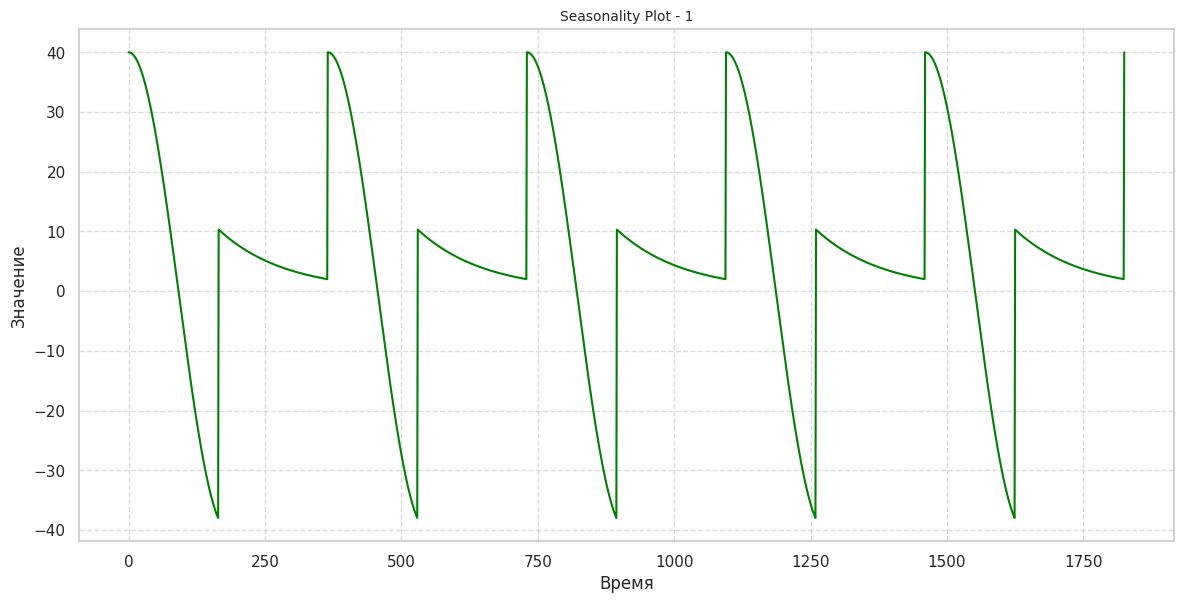

In [ ]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude, phase=0)
plt.figure(figsize=(12, 6))
plot_series(time, series, color="green")
plt.title("Seasonality Plot - 1", fontdict={'fontsize': 10})
plt.show()

## Визуализация с помощью Seaborn

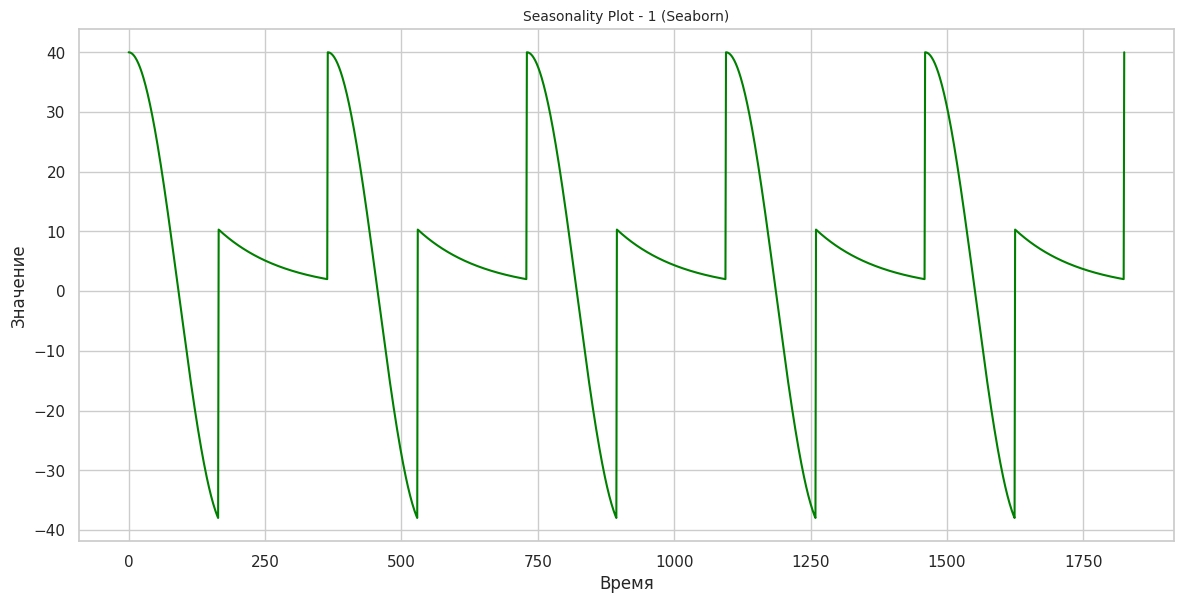

In [ ]:
plt.figure(figsize=(12, 6))
plot_seaborn_series(time, series, color="green")
plt.title("Seasonality Plot - 1 (Seaborn)", fontdict={'fontsize': 10})
plt.show()

## Визуализация с помощью Plotly

In [ ]:
plot_plotly_series(time, series, title="Seasonality Plot - 1 (Plotly)", color="green")

# Сезонность с амплитудой 100 и периодом 90 дней

## Визуализация с помощью Matplotlib

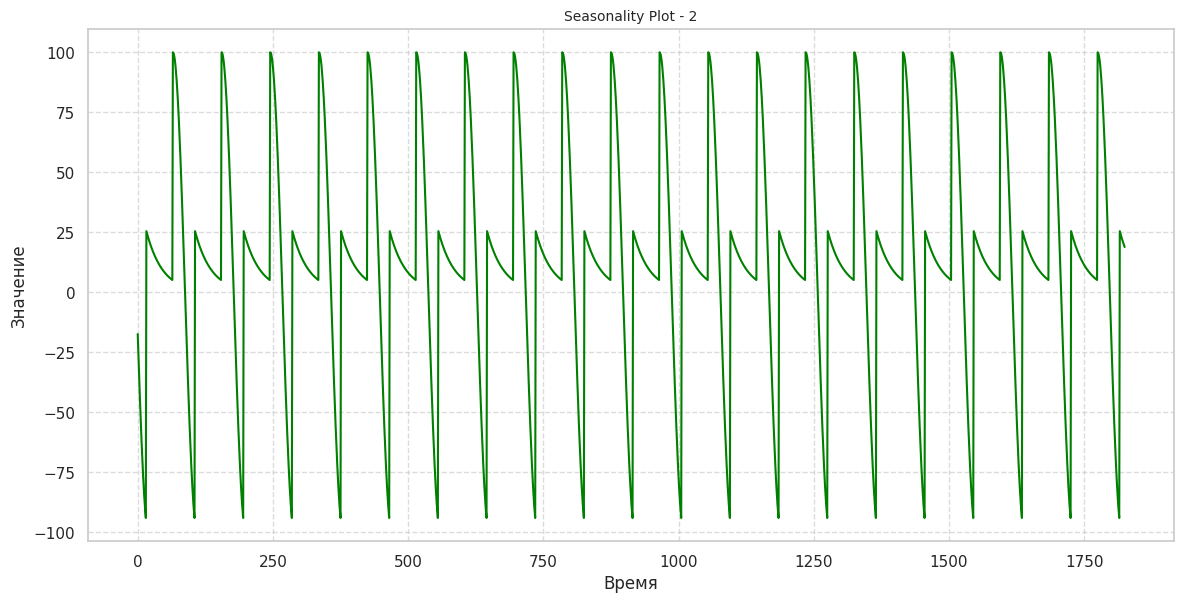

In [ ]:
amplitude = 100
series = seasonality(time, period=90, amplitude=amplitude, phase=25)
plt.figure(figsize=(12, 6))
plot_series(time, series, color="green")
plt.title("Seasonality Plot - 2", fontdict={'fontsize': 10})
plt.show()

## Визуализация с помощью Seaborn

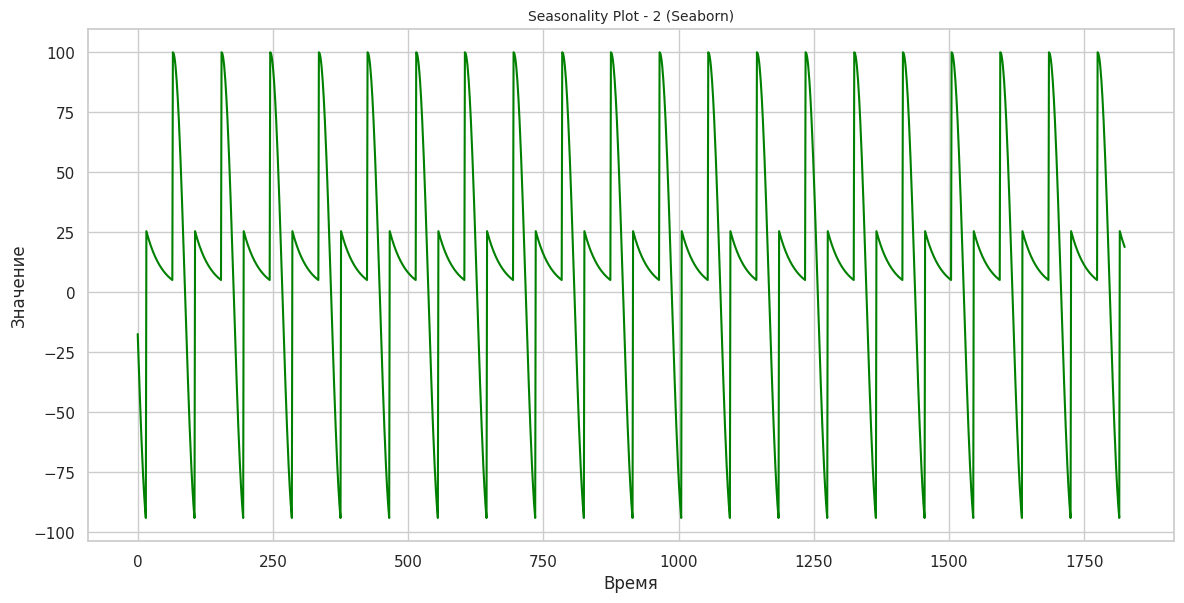

In [ ]:
plt.figure(figsize=(12, 6))
plot_seaborn_series(time, series, color="green")
plt.title("Seasonality Plot - 2 (Seaborn)", fontdict={'fontsize': 10})
plt.show()

## Визуализация с помощью Plotly

In [ ]:
plot_plotly_series(time, series, title="Seasonality Plot - 2 (Plotly)", color="green")

# Генерируем белый шум с уровнем шума 10 и случайным числом

## Визуализация с помощью Matplotlib

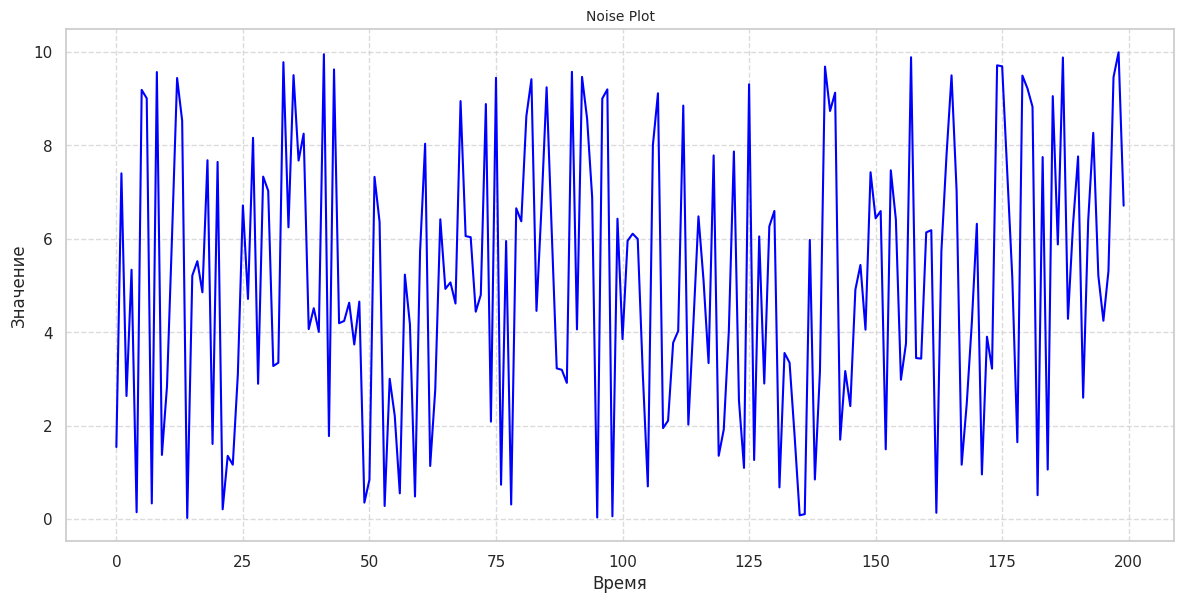

In [ ]:
noise_level = 10
noise = white_noise(time, noise_level, seed=RANDOM_SEED)
plt.figure(figsize=(12, 6))
plot_series(time[:200], noise[:200], color="blue")
plt.title("Noise Plot", fontdict={'fontsize': 10})
plt.show()

## Визуализация с помощью Seaborn

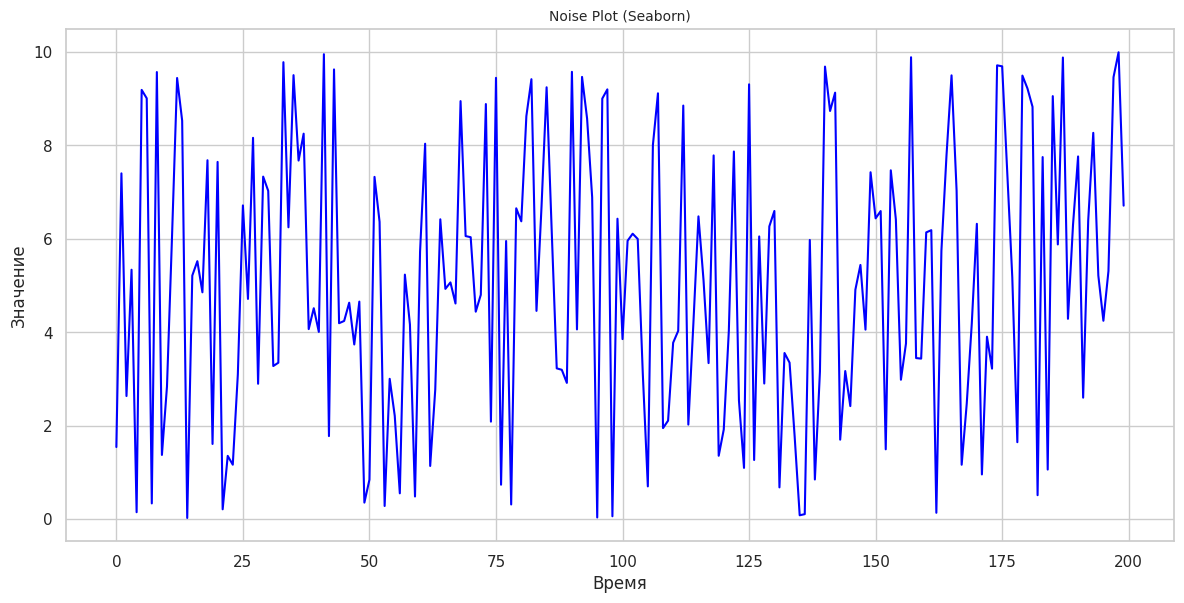

In [ ]:
plt.figure(figsize=(12, 6))
plot_seaborn_series(time[:200], noise[:200], color="blue")
plt.title("Noise Plot (Seaborn)", fontdict={'fontsize': 10})
plt.show()

## Визуализация с помощью Plotly

In [ ]:
plot_plotly_series(time[:200], noise[:200], title="Noise Plot (Plotly)", color="blue")

# Создаем комбинированный график: сезонность + тренд

## Визуализация с помощью Matplotlib

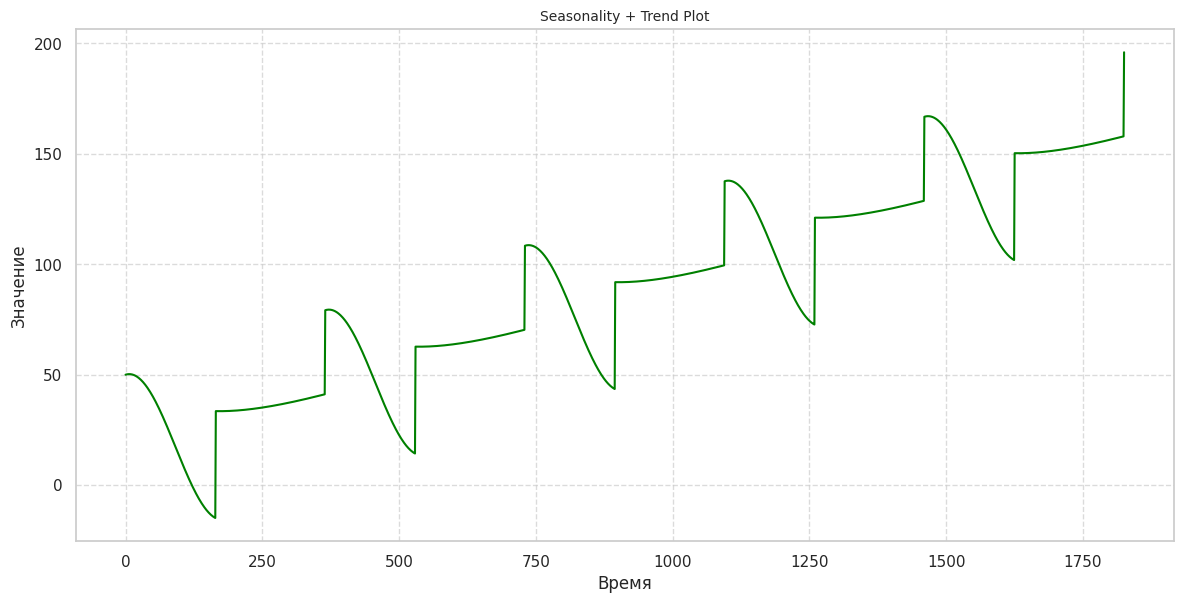

In [ ]:
baseline = 10  # Начальное значение для baseline
slope = 0.08
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
plt.figure(figsize=(12, 6))
plot_series(time, series, color="green")
plt.title("Seasonality + Trend Plot", fontdict={'fontsize': 10})
plt.show()

# Сложные графики: шум + сезонность + тренд

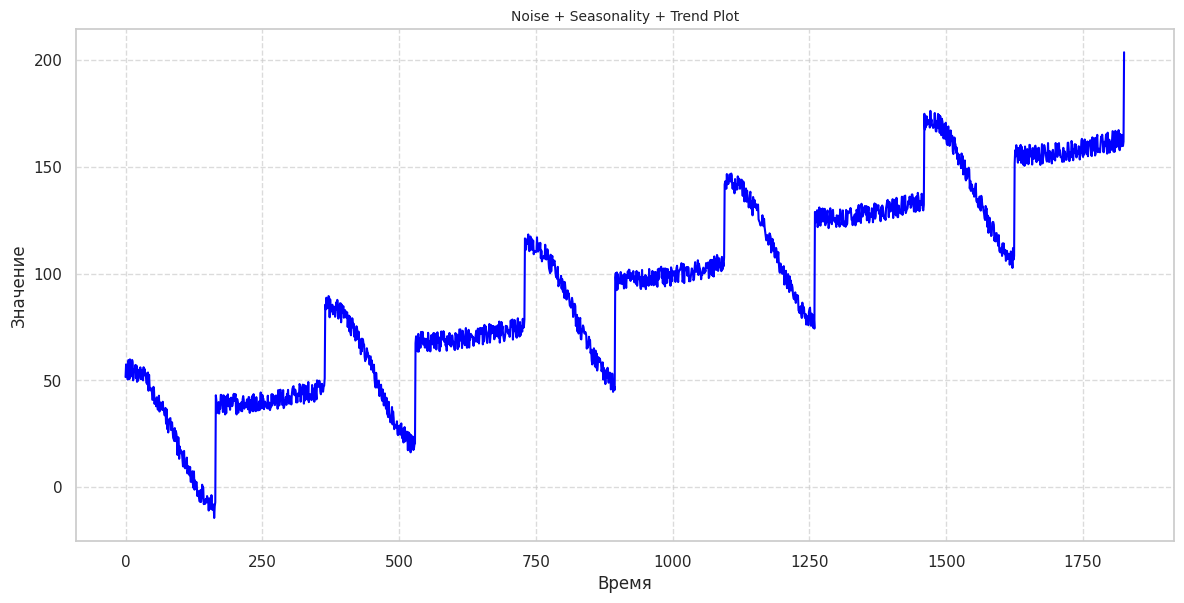

In [ ]:
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
series += white_noise(time, noise_level=10, seed=RANDOM_SEED)
plt.figure(figsize=(12, 6))
plot_series(time, series, color="blue")
plt.title("Noise + Seasonality + Trend Plot", fontdict={'fontsize': 10})
plt.show()

## Визуализация с помощью Seaborn

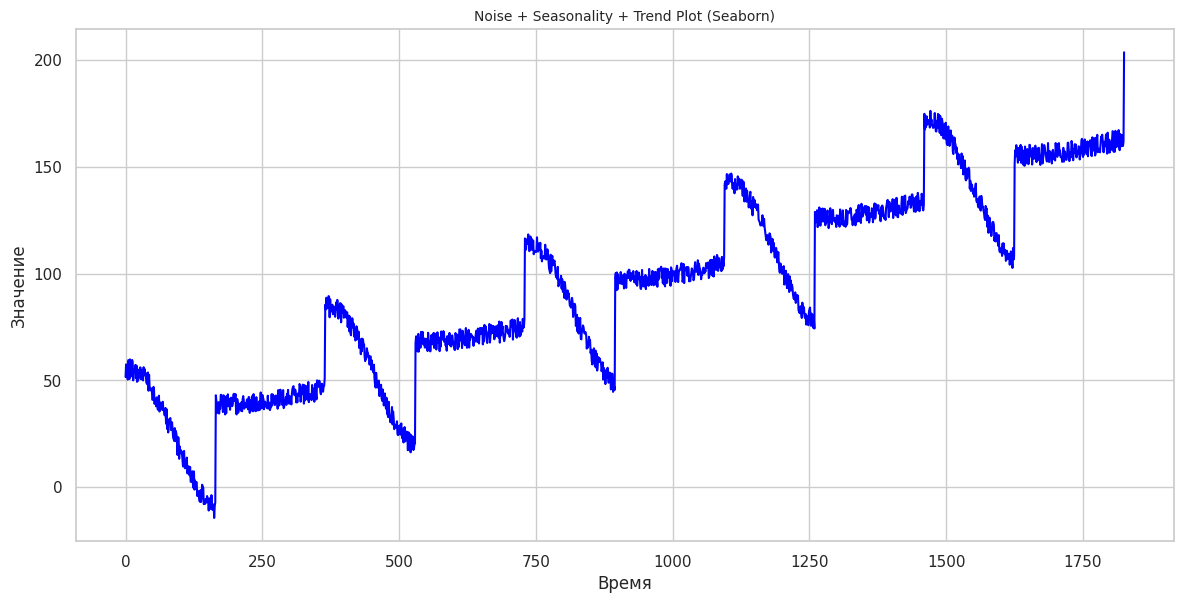

In [ ]:
plt.figure(figsize=(12, 6))
plot_seaborn_series(time, series, color="blue")
plt.title("Noise + Seasonality + Trend Plot (Seaborn)", fontdict={'fontsize': 10})
plt.show()


## Визуализация с помощью Plotly

In [ ]:
plot_plotly_series(time, series, title="Noise + Seasonality + Trend Plot (Plotly)", color="blue")

## Выводы
# Matplotlib: Подходит для базовых статических графиков.
# Seaborn: Обеспечивает простоту и стиль.
# Plotly: Превосходит в интерактивности.
